In [164]:
##Importing the necessaries packages for this project

import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
import sympy as sy
import scipy as sp
import warnings
warnings.filterwarnings("ignore")

Idea: The database obtained from Kaggle, contains valuable information from all countries in the world. The values are related to the cost of living. Below is the first rows of the table

In [165]:
##Importing the CSV file to this project
cost_of_living = pd.read_csv(r"C:\Users\vitor\Documentos\Kaggle\Cost_of_Living_121_Countries.csv")


In [166]:
cost_of_living.head(5)

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,country_code,latitude,longitude
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7,CH,46.818188,8.227512
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6,BS,25.034280,-77.396280
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3,IS,64.963051,-19.020835
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1,SG,1.352083,103.819836
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5,BB,13.193887,-59.543198


As previously printed, there are some variables indicating the cost of living for Groceries, Restaurant Price and Rent Index. <br>
Outcome: Using the Factorial Analysis, reducing the number of variables and create a new factor based on the columns: Rent Index, Groceries Index and Restaurant Price Index. The solution will create a new variable that can be defined as "Cost of Most Common Expesives".

In [167]:
#Information of the table, it will display the type of the variables and allow the analyst to check if there are some missing values, wrong data types, etc
cost_of_living.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            121 non-null    int64  
 1   Country                         121 non-null    object 
 2   Cost of Living Index            121 non-null    float64
 3   Rent Index                      121 non-null    float64
 4   Cost of Living Plus Rent Index  121 non-null    float64
 5   Groceries Index                 121 non-null    float64
 6   Restaurant Price Index          121 non-null    float64
 7   Local Purchasing Power Index    121 non-null    float64
 8   country_code                    121 non-null    object 
 9   latitude                        121 non-null    float64
 10  longitude                       121 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 10.5+ KB


In [168]:
#More information about the table
cost_of_living.describe()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,latitude,longitude
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,61.000000,43.555372,16.052893,30.357851,44.228926,36.471074,65.094215,25.726956,20.319236
std,35.073732,16.147574,11.412267,13.263721,17.055109,18.258110,39.569094,25.087590,60.761360
min,1.000000,18.800000,2.400000,11.100000,17.500000,12.800000,2.300000,-40.900557,-106.346771
25%,31.000000,30.200000,8.500000,19.800000,31.600000,21.600000,34.800000,10.691803,-1.023194
50%,61.000000,39.500000,12.400000,27.000000,40.500000,33.100000,50.600000,31.046051,21.824312
75%,91.000000,52.800000,20.100000,37.000000,53.700000,47.200000,99.400000,44.016521,47.576927
max,121.000000,101.100000,67.200000,74.900000,109.100000,97.000000,182.500000,64.963051,179.414413


In [169]:
#Creating now a new table containing only the necessary variables for these analysis

cost_of_living_values = cost_of_living[["Rent Index", "Groceries Index", "Restaurant Price Index",]]

In [170]:
#For the Factorial Analysis, we must create the Correlation Matrix, as below code:
pg.rcorr(cost_of_living_values, method = 'pearson', upper = 'pval', 
         decimals = 4, 
         pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})

correlation = cost_of_living_values.corr()
correlation

,Rent Index,Groceries Index,Restaurant Price Index
Rent Index,1.000000,0.770944,0.763537
Groceries Index,0.770944,1.000000,0.855057
Restaurant Price Index,0.763537,0.855057,1.000000


In [171]:
#Performing the Sphericity Bartleett test, it will indicate if there are significant correlation betweeen the variables.
bartlett, p_value = calculate_bartlett_sphericity(cost_of_living_values)

print(f'Qui² Bartlett: {round(bartlett, 2)}')
print(f'p-value: {round(p_value, 3)}')

Qui² Bartlett: 274.26
p-value: 0.0


As previous results, there are some relation if we compare the P-value with the 5% - degree of statistical significance

In [172]:
#Defining the PCA, to obtain all the available factors
fa = FactorAnalyzer(n_factors=3, method='principal', rotation=None).fit(cost_of_living_values)

In [173]:
#Creating the Auto-values
autovalues = fa.get_eigenvalues()[0]

In [174]:
#Creating the auto-vectors based on the auto-values previously defined

lamda = sy.symbols("lamda")
sy.init_printing(scale=0.8)

matriz = sy.Matrix(correlation)
polinomio = matriz.charpoly(lamda)

autovalues, autovectors = sp.linalg.eigh(correlation)
autovalues = autovalues[::-1]

autovectors = autovectors[:, ::-1]


In [175]:
#Creating a table with the Auto-Values, Variances and Accumulated Variances
autovalues_factors = fa.get_factor_variance()

eigen_table = pd.DataFrame(autovalues_factors)
eigen_table.columns = [f"Factor {i+1}" for i, v in enumerate(eigen_table.columns)]
eigen_table.index = ['Autovalue','Variance', 'Acumulated Variance']
eigen_table = eigen_table.T

print(eigen_table)

          Autovalue  Variance  Acumulated Variance
Factor 1   2.593764  0.864588             0.864588
Factor 2   0.261457  0.087152             0.951740
Factor 3   0.144779  0.048260             1.000000


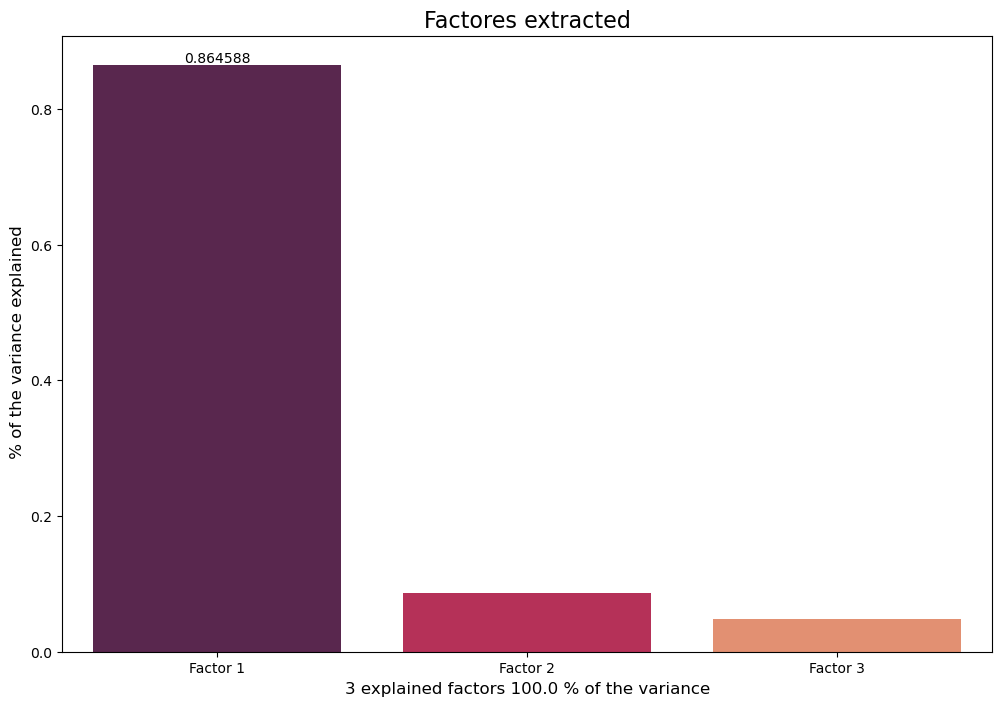

In [176]:
#Ploting a graph with the accumulated variances
plt.figure(figsize=(12,8))
ax = sns.barplot(x=eigen_table.index, y=eigen_table['Variance'], data=eigen_table, palette='rocket')
ax.bar_label(ax.containers[0])
plt.title("Factores extracted", fontsize=16)
plt.xlabel(f"{eigen_table.shape[0]} explained factors {round(eigen_table['Variance'].sum()*100,2)} % of the variance", fontsize=12)
plt.ylabel(" % of the variance explained", fontsize=12)
plt.show()



In [177]:
#Determing the factorial loadings
factor_loadings = fa.loadings_

table_loadings = pd.DataFrame(factor_loadings)
table_loadings.columns = [f"Factor {i+1}" for i, v in enumerate(table_loadings.columns)]
table_loadings.index = cost_of_living_values.columns

print(table_loadings)

                        Factor 1  Factor 2  Factor 3
Rent Index              0.906346  0.422368  0.011936
Groceries Index         0.942725 -0.189924 -0.274222
Restaurant Price Index  0.939984 -0.216775  0.263513


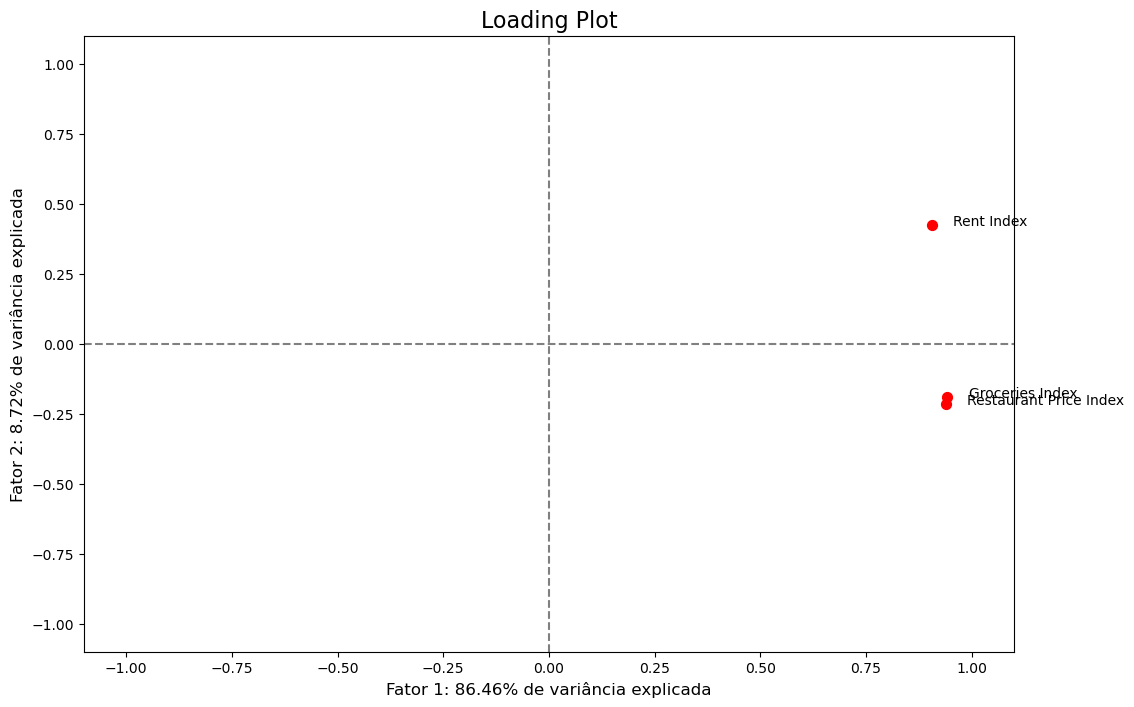

In [178]:
#Ploting the factorial loadings graph

plt.figure(figsize=(12,8))
table_loadings_chart = table_loadings.reset_index()
plt.scatter(table_loadings_chart['Factor 1'], table_loadings_chart['Factor 2'], s=50, color='red')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.05, point['y'], point['val'])

label_point(x = table_loadings_chart['Factor 1'],
            y = table_loadings_chart['Factor 2'],
            val = table_loadings_chart['index'],
            ax = plt.gca()) 

plt.axhline(y=0, color='grey', ls='--')
plt.axvline(x=0, color='grey', ls='--')
plt.ylim([-1.1,1.1])
plt.xlim([-1.1,1.1])
plt.title("Loading Plot", fontsize=16)
plt.xlabel(f"Fator 1: {round(eigen_table.iloc[0]['Variance']*100,2)}% de variância explicada", fontsize=12)
plt.ylabel(f"Fator 2: {round(eigen_table.iloc[1]['Variance']*100,2)}% de variância explicada", fontsize=12)
plt.show()


In [179]:
#Determining the communalities
communalities = fa.get_communalities()

communalities_table = pd.DataFrame(communalities)
communalities_table.columns = ['Communalities']
communalities_table.index = cost_of_living_values.columns

print(communalities_table)

                        Communalities
Rent Index                        1.0
Groceries Index                   1.0
Restaurant Price Index            1.0


In [180]:
#Extracting the values and adding them to the original table
factors = pd.DataFrame(fa.transform(cost_of_living_values))
factors.columns =  [f"Factor {i+1}" for i, v in enumerate(factors.columns)]

cost_of_living = pd.concat([cost_of_living.reset_index(drop=True), factors], axis=1)
cost_of_living

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,country_code,latitude,longitude,Factor 1,Factor 2,Factor 3
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7,CH,46.818188,8.227512,3.530764,-1.206723,-0.954351
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6,BS,25.034280,-77.396280,2.367906,-0.798859,0.669901
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3,IS,64.963051,-19.020835,2.660048,-0.893931,0.280072
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1,SG,1.352083,103.819836,2.500133,5.336039,-1.621571
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5,BB,13.193887,-59.543198,1.529530,-2.646721,-0.760700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,117,Bangladesh,22.5,2.4,12.8,25.7,12.8,33.1,BD,23.684994,90.356331,-1.288081,-0.068804,-0.402254
117,118,India,21.2,5.6,13.7,23.8,15.1,82.6,IN,20.593684,78.962880,-1.184510,0.362432,0.063077
118,119,Egypt,21.0,3.7,12.7,21.2,16.2,20.0,EG,26.820553,30.802498,-1.276642,0.153403,0.449352
119,120,Libya,20.4,4.3,12.7,22.2,15.2,42.0,LY,26.335100,17.228331,-1.256726,0.241518,0.242085


In [181]:
#Identifying the scores of the factors
scores = fa.weights_

scores_table = pd.DataFrame(scores)
scores_table.columns = [f"Factor {i+1}" for i, v in enumerate(scores_table.columns)]
scores_table.index = cost_of_living_values.columns

print(scores_table)

                        Factor 1  Factor 2  Factor 3
Rent Index              0.349433  1.615438  0.082444
Groceries Index         0.363458 -0.726407 -1.894072
Restaurant Price Index  0.362402 -0.829103  1.820102


In [182]:
#Checking if the correlation of the obtained factors is equal zero
pg.rcorr(cost_of_living[['Factor 1','Factor 2', 'Factor 3']],
         method = 'pearson', upper = 'pval', 
         decimals = 4, 
         pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})

,Factor 1,Factor 2,Factor 3
Factor 1,-,,
Factor 2,0.0,-,
Factor 3,-0.0,0.0,-


In [183]:
#To determine the factor that will be used, we must check if there are any auto-values above 1. In this case, only one factor fits on this situation
#Now, we will perform the Factor Analysis only for one factor
fa = FactorAnalyzer(n_factors=1, method='principal', rotation=None).fit(cost_of_living_values)

autovalues_factors = fa.get_factor_variance()

eigen_table = pd.DataFrame(autovalues_factors)
eigen_table.columns = [f"Factor {i+1}" for i, v in enumerate(eigen_table.columns)]
eigen_table.index = ['Autovalue','Variance', 'Accumulated Variance']
eigen_table = eigen_table.T

print(eigen_table)

          Autovalue  Variance  Accumulated Variance
Factor 1   2.593764  0.864588              0.864588


In [184]:
#Creating the factorial loading for this factor

table_loadings = fa.loadings_

table_loadings = pd.DataFrame(table_loadings)
table_loadings.columns = [f"Factor {i+1}" for i, v in enumerate(table_loadings.columns)]
table_loadings.index = cost_of_living_values.columns

print(table_loadings)

                        Factor 1
Rent Index              0.906346
Groceries Index         0.942725
Restaurant Price Index  0.939984


In [185]:
#Determining the communalities for this one factor

communalities = fa.get_communalities()

communalities_table = pd.DataFrame(communalities)
communalities_table.columns = ['Communalities']
communalities_table.index = cost_of_living_values.columns

print(communalities_table)

                        Communalities
Rent Index                   0.821463
Groceries Index              0.888731
Restaurant Price Index       0.883570


In [186]:
#Removing the previous factors created
cost_of_living = cost_of_living.drop(columns=['Factor 1', 'Factor 2', 'Factor 3'])


#Adding the new factor to the original table
factors = pd.DataFrame(fa.transform(cost_of_living_values))
factors.columns =  [f"Factor {i+1}" for i, v in enumerate(factors.columns)]

cost_of_living = pd.concat([cost_of_living.reset_index(drop=True), factors], axis=1)
cost_of_living


,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,country_code,latitude,longitude,Factor 1
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7,CH,46.818188,8.227512,3.530764
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6,BS,25.034280,-77.396280,2.367906
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3,IS,64.963051,-19.020835,2.660048
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1,SG,1.352083,103.819836,2.500133
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5,BB,13.193887,-59.543198,1.529530
...,...,...,...,...,...,...,...,...,...,...,...,...
116,117,Bangladesh,22.5,2.4,12.8,25.7,12.8,33.1,BD,23.684994,90.356331,-1.288081
117,118,India,21.2,5.6,13.7,23.8,15.1,82.6,IN,20.593684,78.962880,-1.184510
118,119,Egypt,21.0,3.7,12.7,21.2,16.2,20.0,EG,26.820553,30.802498,-1.276642
119,120,Libya,20.4,4.3,12.7,22.2,15.2,42.0,LY,26.335100,17.228331,-1.256726


In [187]:
#Creating the scores for this factor
scores = fa.weights_

scores_table = pd.DataFrame(scores)
scores_table.columns = [f"Factor {i+1}" for i, v in enumerate(scores_table.columns)]
scores_table.index = cost_of_living_values.columns

print(scores_table)

                        Factor 1
Rent Index              0.349433
Groceries Index         0.363458
Restaurant Price Index  0.362402


In [188]:
#Determining the rankings for this factor and adding them to the original table.
cost_of_living['Ranking'] = 0

for index, item in enumerate(list(eigen_table.index)):
    variance = eigen_table.loc[item]['Variance']

    cost_of_living['Ranking'] = cost_of_living['Ranking'] + cost_of_living[eigen_table.index[index]]*variance
    
cost_of_living

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,country_code,latitude,longitude,Factor 1,Ranking
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7,CH,46.818188,8.227512,3.530764,3.052656
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6,BS,25.034280,-77.396280,2.367906,2.047263
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3,IS,64.963051,-19.020835,2.660048,2.299845
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1,SG,1.352083,103.819836,2.500133,2.161585
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5,BB,13.193887,-59.543198,1.529530,1.322414
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,117,Bangladesh,22.5,2.4,12.8,25.7,12.8,33.1,BD,23.684994,90.356331,-1.288081,-1.113660
117,118,India,21.2,5.6,13.7,23.8,15.1,82.6,IN,20.593684,78.962880,-1.184510,-1.024113
118,119,Egypt,21.0,3.7,12.7,21.2,16.2,20.0,EG,26.820553,30.802498,-1.276642,-1.103769
119,120,Libya,20.4,4.3,12.7,22.2,15.2,42.0,LY,26.335100,17.228331,-1.256726,-1.086550


In [189]:
#I'll rename the Factor 1 variable to Cost of Most Common Expesives
cost_of_living = cost_of_living.rename(columns={"Factor 1": "Index Cost of Most Common Expesives"})

In [190]:
#This is the final result
cost_of_living

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,country_code,latitude,longitude,Index Cost of Most Common Expesives,Ranking
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7,CH,46.818188,8.227512,3.530764,3.052656
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6,BS,25.034280,-77.396280,2.367906,2.047263
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3,IS,64.963051,-19.020835,2.660048,2.299845
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1,SG,1.352083,103.819836,2.500133,2.161585
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5,BB,13.193887,-59.543198,1.529530,1.322414
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,117,Bangladesh,22.5,2.4,12.8,25.7,12.8,33.1,BD,23.684994,90.356331,-1.288081,-1.113660
117,118,India,21.2,5.6,13.7,23.8,15.1,82.6,IN,20.593684,78.962880,-1.184510,-1.024113
118,119,Egypt,21.0,3.7,12.7,21.2,16.2,20.0,EG,26.820553,30.802498,-1.276642,-1.103769
119,120,Libya,20.4,4.3,12.7,22.2,15.2,42.0,LY,26.335100,17.228331,-1.256726,-1.086550


In [191]:
#End of code